## CMEE MSC Project 2019
### Synthetic data for 5 rate sum of exponentials
---

In [1]:
# import tools #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
plt.style.use("seaborn-white")

# add code path to environment #
import sys
sys.path.insert(1, "../Code/")

# import package for sum of exponential fitting #
import config
from sumexp import *

# functions #
def fit_sumexp(data, lower, upper, resolution, geom=True):
    # fit a sum of exponentials, return model, psi values
    if geom:
        config.FIXED_RATES = np.geomspace(lower, upper, resolution)
    else:
        config.FIXED_RATES = np.linspace(lower, upper, resolution)
    startest = [1/len(config.FIXED_RATES)] * (len(config.FIXED_RATES)-1)
    model = minimize_model(startest, data)
    psi = model.x
    psi = np.append(psi, 1-sum(psi))
    return (model, psi, config.FIXED_RATES)

__Sum of exponentials:__ Generate data sampled from a sum of exponentials. 

The plots and working bellow show how the method identifies the original rate and associated proportion representated in the data. The ability to identify the actual underlying rates in the data is dependent upon the sample size of the data contributing for each rate. For example: With 1000 observations a split of 70/20 for rates 1.1 and 2.8 

In [2]:
# set seed to track results
# create data
s_rts = [1.8, 4.4, 7.5, 12.5, 16.7]
s_psi = [1/len(s_rts)]*len(s_rts)
n = 1000

seed_val = 11
np.random.seed(seed_val)

sexp = sample_sumexp(s_rts, s_psi, n)
sexp = np.reshape(sexp, len(sexp))

Bounds: 1 - 30
Resolution: 350
---
Optimization terminated successfully.
MLE: 685.7201753215711

#####

[ 1.49714286  2.65714286  2.74        2.82285714  2.90571429  9.28571429
  9.36857143  9.45142857  9.53428571  9.61714286  9.7         9.78285714
  9.86571429  9.94857143 10.03142857 10.11428571 10.19714286 10.28
 21.96285714 22.04571429 22.12857143 22.21142857 22.29428571 22.37714286
 22.46       22.54285714 22.62571429 22.70857143 22.79142857 22.87428571
 22.95714286] [0.05068279 0.07799414 0.11810291 0.08880199 0.00120766 0.02092597
 0.04328684 0.05668825 0.06146687 0.06025538 0.0644654  0.06395917
 0.05916861 0.05185322 0.04388373 0.03310285 0.02684302 0.01338415
 0.00142504 0.00365513 0.00539893 0.00664863 0.00739659 0.0076353
 0.00736158 0.0070143  0.0060986  0.00460681 0.00287806 0.0022841
 0.00137551] 0.9998515331275761


1.497142857142857 - 0.05068278733383427
2.657142857142857 - 0.07799413591987736
2.7399999999999998 - 0.11810291143132443
2.822857142857143 - 0.0888019940358

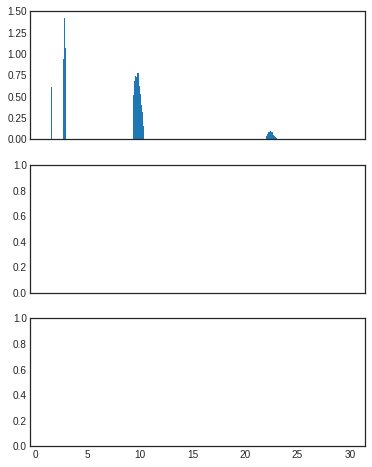

In [3]:
# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 30
resolution = 350

# fit model
model, psi, rts = fit_sumexp(sexp, lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

# Get histogram data
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(6, 8))


values, bins, _ = ax[0].hist(rts,
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(sexp)))


def single_exp(r, x):
    return np.sum(np.log(r*np.exp(-r*x)))

single_exp(1/np.mean(sexp), sexp)

# create table for report
df = pd.DataFrame({"$n$" : [1000] * len(bins[rte_idx]),"$\lambda$" : bins[rte_idx], "$\psi$" : areas[rte_idx]})

In [4]:
# set seed to track results
# create data
s_rts = [1.8, 4.4, 7.5, 12.5, 16.7]
s_psi = [1/len(s_rts)]*len(s_rts)
n = 10000

seed_val = 11
np.random.seed(seed_val)

sexp = sample_sumexp(s_rts, s_psi, n)
sexp = np.reshape(sexp, len(sexp))

In [5]:
# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 30
resolution = 350

# fit model
model, psi, rts = fit_sumexp(sexp, lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

values, bins, _ = ax[1].hist(rts,
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(sexp)))


def single_exp(r, x):
    return np.sum(np.log(r*np.exp(-r*x)))

single_exp(1/np.mean(sexp), sexp)

df1 = pd.DataFrame({"$n$" : [10000] * len(bins[rte_idx]),"$\lambda$" : bins[rte_idx], "$\psi$" : areas[rte_idx]})


../Code/sumexp.py:47: RuntimeWarning: invalid value encountered in log
  return (-1)* sum(np.log(sumexp_eq(psi, x)))


Bounds: 1 - 30
Resolution: 350
---
Optimization terminated successfully.
MLE: 6700.113821103197

#####

[ 1.          2.07714286  2.16        4.89428571  4.97714286 12.43428571
 12.51714286 12.6        12.68285714 12.76571429 29.91714286] [0.00991605 0.03380533 0.20703276 0.15460206 0.07936015 0.01802101
 0.10065405 0.14045147 0.13630823 0.08820809 0.03164081] 0.9999999975838254


1.0 - 0.00991604726596929
2.077142857142857 - 0.033805328257733885
2.16 - 0.20703275976723742
4.894285714285714 - 0.15460205962143764
4.977142857142857 - 0.07936014577105929
12.434285714285714 - 0.018021008438370314
12.517142857142856 - 0.10065405164879415
12.6 - 0.14045147355517174
12.682857142857141 - 0.13630822664163122
12.765714285714285 - 0.08820808643477222
29.917142857142856 - 0.031640810181648285
AN Pest = 4.794143274607167


In [6]:
# set seed to track results
# create data
s_rts = [1.8, 4.4, 7.5, 12.5, 16.7]
s_psi = [1/len(s_rts)]*len(s_rts)
n = 100000

seed_val = 11
np.random.seed(seed_val)

sexp = sample_sumexp(s_rts, s_psi, n)
sexp = np.reshape(sexp, len(sexp))


In [7]:
# fit with sum of exponentials
# Define the rates to use
lower = 1
upper = 30
resolution = 350

# fit model
model, psi, rts = fit_sumexp(sexp, lower, upper, resolution, geom=False)


# get the activated rates
active_p = np.where(psi > 0.001)
active_rts = rts[active_p]
active_psi = psi[active_p]

print("Bounds: {} - {}\nResolution: {}\n---\n{}\nMLE: {}".format(lower,
                                                                 upper,
                                                                 resolution,
                                                                 model.message,
                                                                 -model.fun,))

print("\n#####\n")

values, bins, _ = ax[2].hist(rts,
                             bins=resolution,
                             weights=psi,
                             density=True)


# show area of activated bins as weights for rates
areas = np.diff(bins)*values
area_t = sum(areas)
rte_idx = np.where(areas > 0.001)

print(bins[rte_idx], areas[rte_idx], sum(areas[rte_idx]))
print("\n")

for i in range(len(bins[rte_idx])):
    print("{} - {}".format(bins[rte_idx][i], areas[rte_idx][i]))

print("AN Pest = {}".format(1/np.mean(sexp)))


def single_exp(r, x):
    return np.sum(np.log(r*np.exp(-r*x)))

single_exp(1/np.mean(sexp), sexp)

df2 = pd.DataFrame({"$n$" : [100000] * len(bins[rte_idx]),"$\lambda$" : bins[rte_idx], "$\psi$" : areas[rte_idx]})

Bounds: 1 - 30
Resolution: 350
---
Optimization terminated successfully.
MLE: 66584.85959830333

#####

[ 1.74571429  1.82857143  4.31428571  4.39714286  7.21428571  7.29714286
  7.38       15.33428571 15.41714286 15.5        15.58285714] [0.00640847 0.2039635  0.12647298 0.01786779 0.001503   0.14653918
 0.14336195 0.05009397 0.13686645 0.13232624 0.03459643] 0.9999999653285083


1.7457142857142856 - 0.006408472940592974
1.8285714285714285 - 0.203963498378051
4.314285714285714 - 0.12647297830356433
4.397142857142857 - 0.017867787313051504
7.2142857142857135 - 0.0015029973763468864
7.297142857142857 - 0.146539179631176
7.38 - 0.14336195362740736
15.334285714285713 - 0.050093972893073255
15.417142857142856 - 0.13686645196580002
15.499999999999998 - 0.13232623817835049
15.582857142857142 - 0.03459643472109449
AN Pest = 4.7431088114600755


In [8]:
# get table [Manual edditing may be required later for best look formating]
all_df = df.append(df1)
all_df = all_df.append(df2)

# save table
path = "../Results/LatexTables/Sum2exp_1844_5.tex"
with open(path, 'w') as tf:
     tf.write(all_df.to_latex(index=False, escape=False))
        
all_df

,$n$,$\lambda$,$\psi$
0,1000,1.497143,0.050242
1,1000,2.740000,0.285434
2,1000,9.617143,0.128375
3,1000,9.700000,0.195719
4,1000,9.782857,0.181994
5,1000,9.865714,0.094545
6,1000,22.377143,0.003371
7,1000,22.460000,0.020353
8,1000,22.542857,0.019953
9,1000,22.625714,0.015760


In [9]:
# make report plot
path = "../Results/Plots/SyntheticData_2exp1844_5.pdf"

fig.text(0.5, 0.08, '$\lambda$', ha='center')
fig.text(0.02, 0.5, 'Frequency', va='center', rotation='vertical')
fig.text(0.06, 0.88, 'A', fontweight='bold')
fig.text(0.06, 0.6, 'B', fontweight='bold')
fig.text(0.06, 0.34, 'C', fontweight='bold')
fig.wspace = 2.5

fig.savefig(path)